## Clusterización

In [1]:
#Librerías
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Algoritmo KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz
from sklearn.metrics import davies_bouldin_score # Método de validación Davies Bouldin
from validclust.indices import dunn # Método de validación Dunn
from yellowbrick.cluster import KElbowVisualizer # Visualizador del diagrama del codo
from sklearn.metrics import pairwise_distances

Llamamos todas bases de datos generadas

In [2]:

df_escalado=pd.read_parquet('../data/processed/analisis_exploratorio.parquet')

In [3]:
df_escaladowithuser=pd.read_parquet('../data/processed/analisis_exploratorio2.parquet')

In [4]:
df_escalado_gb=pd.read_parquet('../data/processed/analisis_exploratorio3.parquet')

In [5]:
clustertest=pd.read_parquet('../data/processed/analisis_exploratorio4.parquet')

In [6]:
df_escalado_gb_nouser=df_escalado_gb.drop(columns='Usercode')
df_escalado_gb_nouser

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,0.000014,0.032415,0.155834,0.315247,0.000619,0.009132
1,0.000305,0.024913,0.092645,0.315062,0.001044,0.009132
2,0.000046,0.045734,0.000000,0.315241,0.012657,0.013699
3,0.000468,0.044260,0.130006,0.314577,0.000934,0.191781
4,0.001488,0.047081,0.253136,0.314927,0.000586,0.018265
...,...,...,...,...,...,...
4144,0.000725,0.000000,0.000000,0.315141,0.000563,0.000000
4145,0.000146,0.068841,0.646522,0.315272,0.001405,0.009132
4146,0.000036,0.048413,0.082636,0.315192,0.002411,0.214612
4147,0.005670,0.009442,0.018833,0.297175,0.001283,0.009132


In [9]:
pip install validclust yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


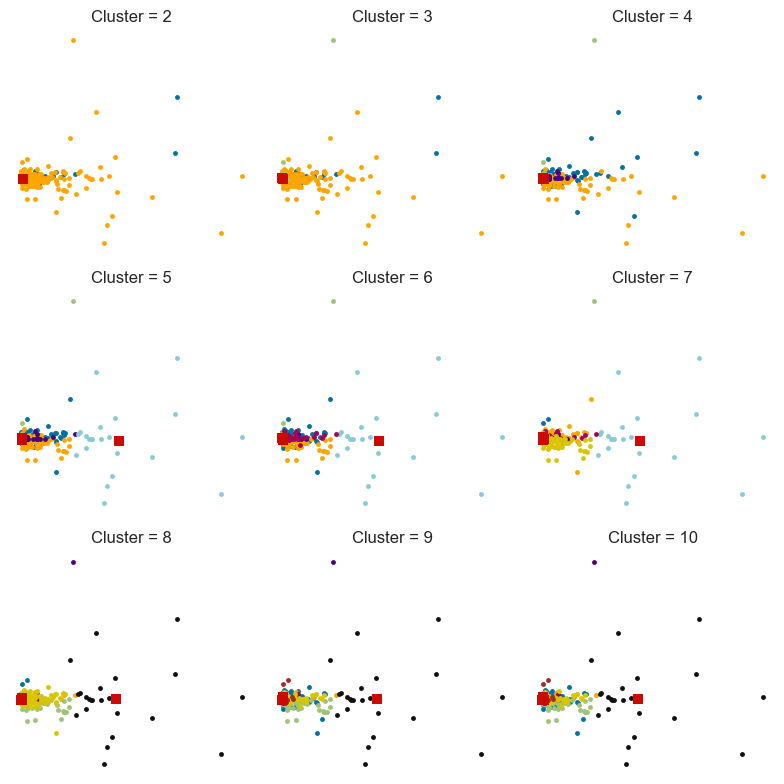

In [8]:
#Analizando dos variables
x1 = df_escalado_gb_nouser['Bet']
x2 = df_escalado_gb_nouser['Profit']
feature_A = 0 #Indices de las columnas, donde están las caracteristicas.
feature_B = 3

fig1,axes1 = plt.subplots(3,3,figsize = (8,8))
error = 1e-4
max_iteraciones = 500
colors = ["b", "orange", "g", "indigo", "c", "m", "y", "k", "Brown", "ForestGreen"]

Modelos = []
Vector_Clases = []
Matriz_Centros = []

Silueta = []
CH = []
DB = []
DU = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  Modelo_Kmeans = KMeans(n_clusters = ncenters, max_iter = max_iteraciones, tol = error, random_state = 17)
  Modelo_Kmeans.fit(df_escalado_gb_nouser)
  Clases = Modelo_Kmeans.labels_
  Centros = Modelo_Kmeans.cluster_centers_
  Modelos.append(Modelo_Kmeans)
  Vector_Clases.append(Clases)
  Matriz_Centros.append(Centros)
  
  Silueta.append(silhouette_score(df_escalado_gb_nouser, Clases))
  CH.append(calinski_harabasz_score(df_escalado_gb_nouser, Clases))
  DB.append(davies_bouldin_score(df_escalado_gb_nouser, Clases))
  dist = pairwise_distances(df_escalado_gb_nouser)
  DU.append(dunn(dist,Clases))
  
  for j in range(ncenters):
    ax.plot(x1[Clases == j], x2[Clases == j], '.', color = colors[j])
  
  for pt in Centros:
    ax.plot(pt[feature_A],pt[feature_B],'rs')

  ax.set_title('Cluster = {0}'.format(ncenters))
  ax.axis('off')

fig1.tight_layout()
plt.show()

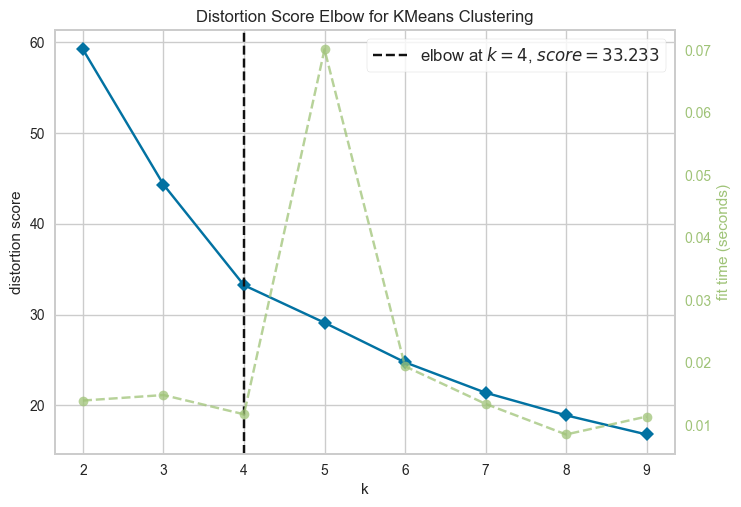

In [9]:
#El método del codo
error = 1e-4
max_iteraciones = 5000


fig, ax = plt.subplots()


Codito = KElbowVisualizer(KMeans(max_iter = max_iteraciones, tol = error, random_state = 17), 
                              k = (2,10), ax = ax)
Codito.fit(df_escalado_gb_nouser)
ax.set_xticks(range(2,10))
Codito.show()
plt.show()

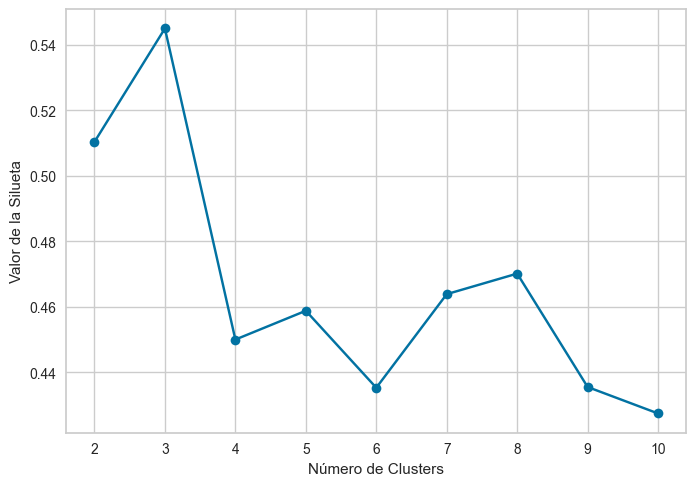

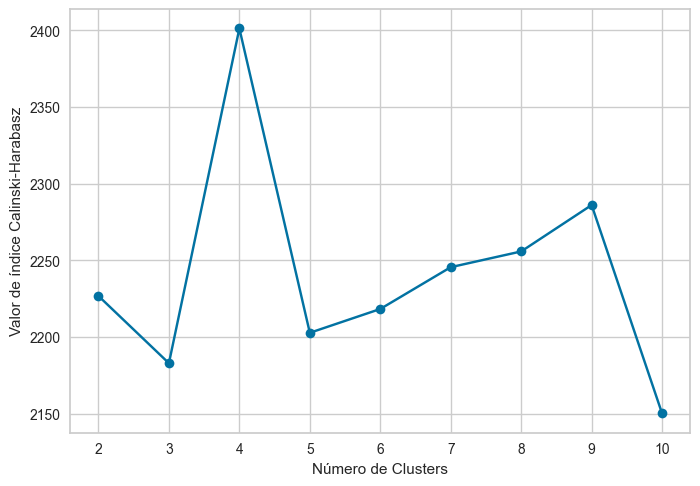

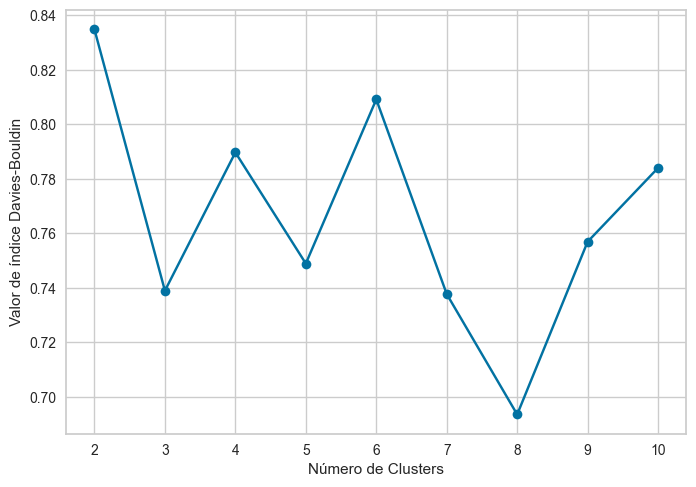

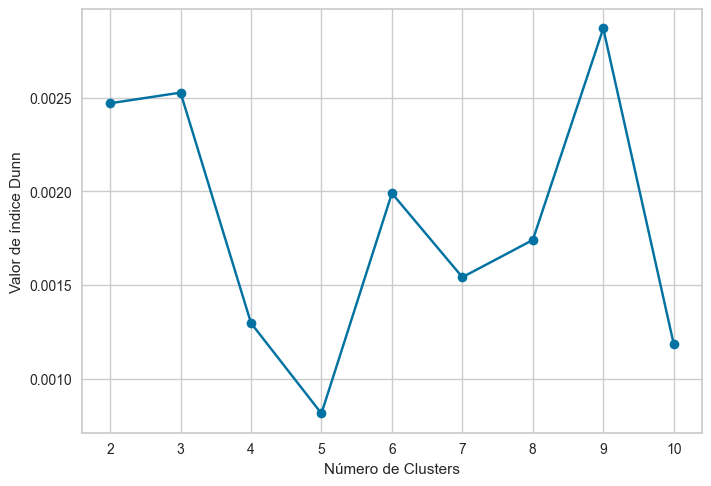

In [10]:
#Análisis valor de la silueta, Calinski-Harabasz, Davies-Bouldin y índice Dunn
fig3, ax3 = plt.subplots()
ax3.plot(np.r_[2:11], Silueta, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de la Silueta")

fig4, ax4 = plt.subplots()
ax4.plot(np.r_[2:11], CH, marker = 'o')
ax4.set_xlabel("Número de Clusters")
ax4.set_ylabel("Valor de índice Calinski-Harabasz")

fig5, ax5 = plt.subplots()
ax5.plot(np.r_[2:11], DB, marker = 'o')
ax5.set_xlabel("Número de Clusters")
ax5.set_ylabel("Valor de índice Davies-Bouldin")
plt.show()

fig6, ax6 = plt.subplots()
ax6.plot(np.r_[2:11], DU, marker = 'o')
ax6.set_xlabel("Número de Clusters")
ax6.set_ylabel("Valor de índice Dunn")
plt.show()

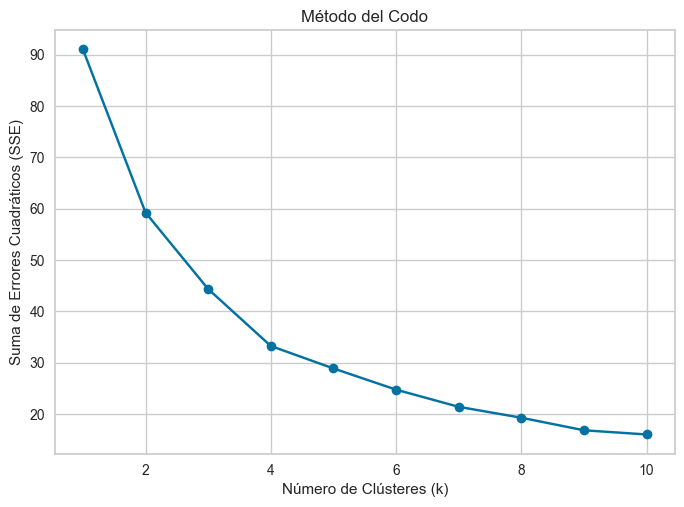

In [11]:
#Método del codo otra manera de hacerlo
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_escalado_gb_nouser)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.title('Método del Codo')
plt.show()



In [26]:
# Aplicar K-Means con el número óptimo de clústeres
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(df_escalado_gb_nouser)

In [ ]:
#clusters = KMeans(n_clusters=i, random_state=0).fit_predict(df_escalado_gb_nouser)

In [27]:
# Añadir el resultado de clustering
df_escalado_gb['Cluster'] = clusters

In [62]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [28]:
# Verificar resultados
df_escalado_gb

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
0,----------------,0.000014,0.032415,0.155834,0.315247,0.000619,0.009132,3
1,--dilib--,0.000305,0.024913,0.092645,0.315062,0.001044,0.009132,3
2,-31337-,0.000046,0.045734,0.000000,0.315241,0.012657,0.013699,1
3,-Nothing-,0.000468,0.044260,0.130006,0.314577,0.000934,0.191781,2
4,-Tachyon,0.001488,0.047081,0.253136,0.314927,0.000586,0.018265,0
...,...,...,...,...,...,...,...,...
4144,zuko,0.000725,0.000000,0.000000,0.315141,0.000563,0.000000,1
4145,zum,0.000146,0.068841,0.646522,0.315272,0.001405,0.009132,0
4146,zviadits,0.000036,0.048413,0.082636,0.315192,0.002411,0.214612,2
4147,zzanggu,0.005670,0.009442,0.018833,0.297175,0.001283,0.009132,1


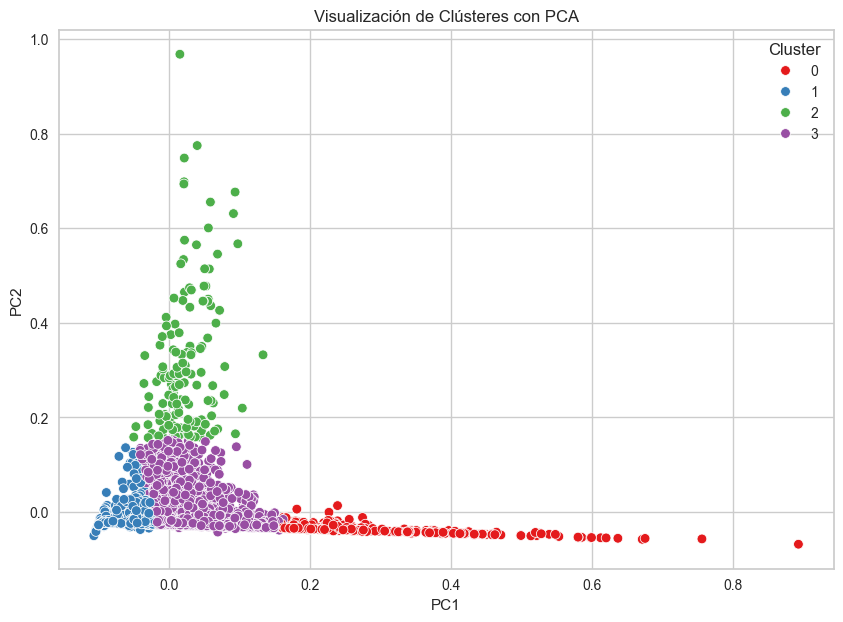

In [29]:
# Reducir a dos dimensiones para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_escalado_gb_nouser)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Visualización de Clústeres con PCA')
plt.show()

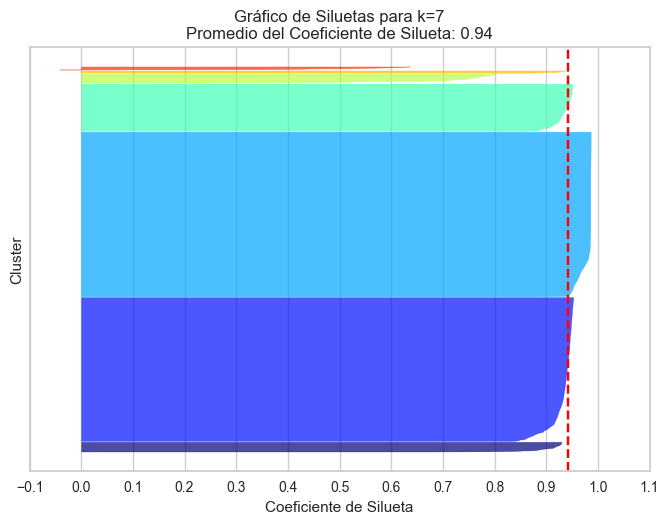

In [72]:
#Método de la silueta
n_clusters = 7

# Ajustar K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pca)
labels = kmeans.labels_

# Calcular el coeficiente de silueta
silhouette_vals = silhouette_samples(df_pca, labels)
silhouette_avg = silhouette_score(df_pca, labels)

# Ordenar los valores de silueta por cluster
y_lower = 10
for i in range(n_clusters):
    # Obtener los valores de silueta para el cluster i
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    
    # Determinar la posición del cluster
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    
    # Crear una banda horizontal para el cluster i
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      alpha=0.7,
                      color=plt.cm.jet(i / n_clusters))
    
    # Etiquetar el cluster
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i + 1),
             ha='center', va='center', color='white')
    
    # Actualizar la posición para el próximo cluster
    y_lower = y_upper + 10

# Configurar el gráfico
plt.title(f'Gráfico de Siluetas para k={n_clusters}\nPromedio del Coeficiente de Silueta: {silhouette_avg:.2f}')
plt.xlabel('Coeficiente de Silueta')
plt.ylabel('Cluster')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.yticks([])
plt.xticks(np.arange(-0.1, 1.1, 0.1))
plt.show()

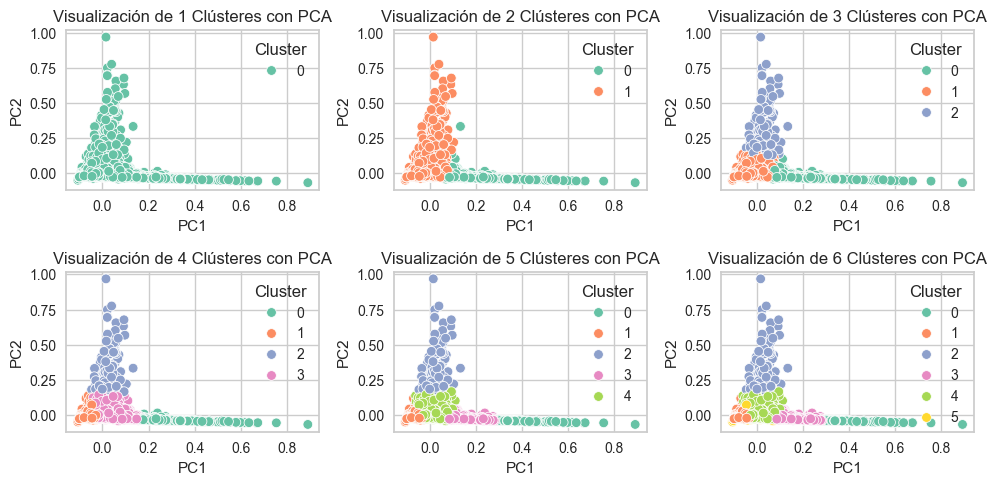

In [58]:
#Generamos gráficamente i número de clusters
plt.figure(figsize=(10, 7))
axes = axes.flatten()
for i in range(1,7):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(df_escalado_gb_nouser)
    df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
    df_pca['Cluster'] = KMeans(n_clusters=i, random_state=0).fit_predict(df_escalado_gb_nouser)
    #ax.scatter(kmeanss.cluster_centers_[:, 0], kmeanss.cluster_centers_[:, 1], c='black', marker='X', s=100, label='Centroides')
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
    plt.title(f'Visualización de {i} Clústeres con PCA')
plt.tight_layout()
plt.show()

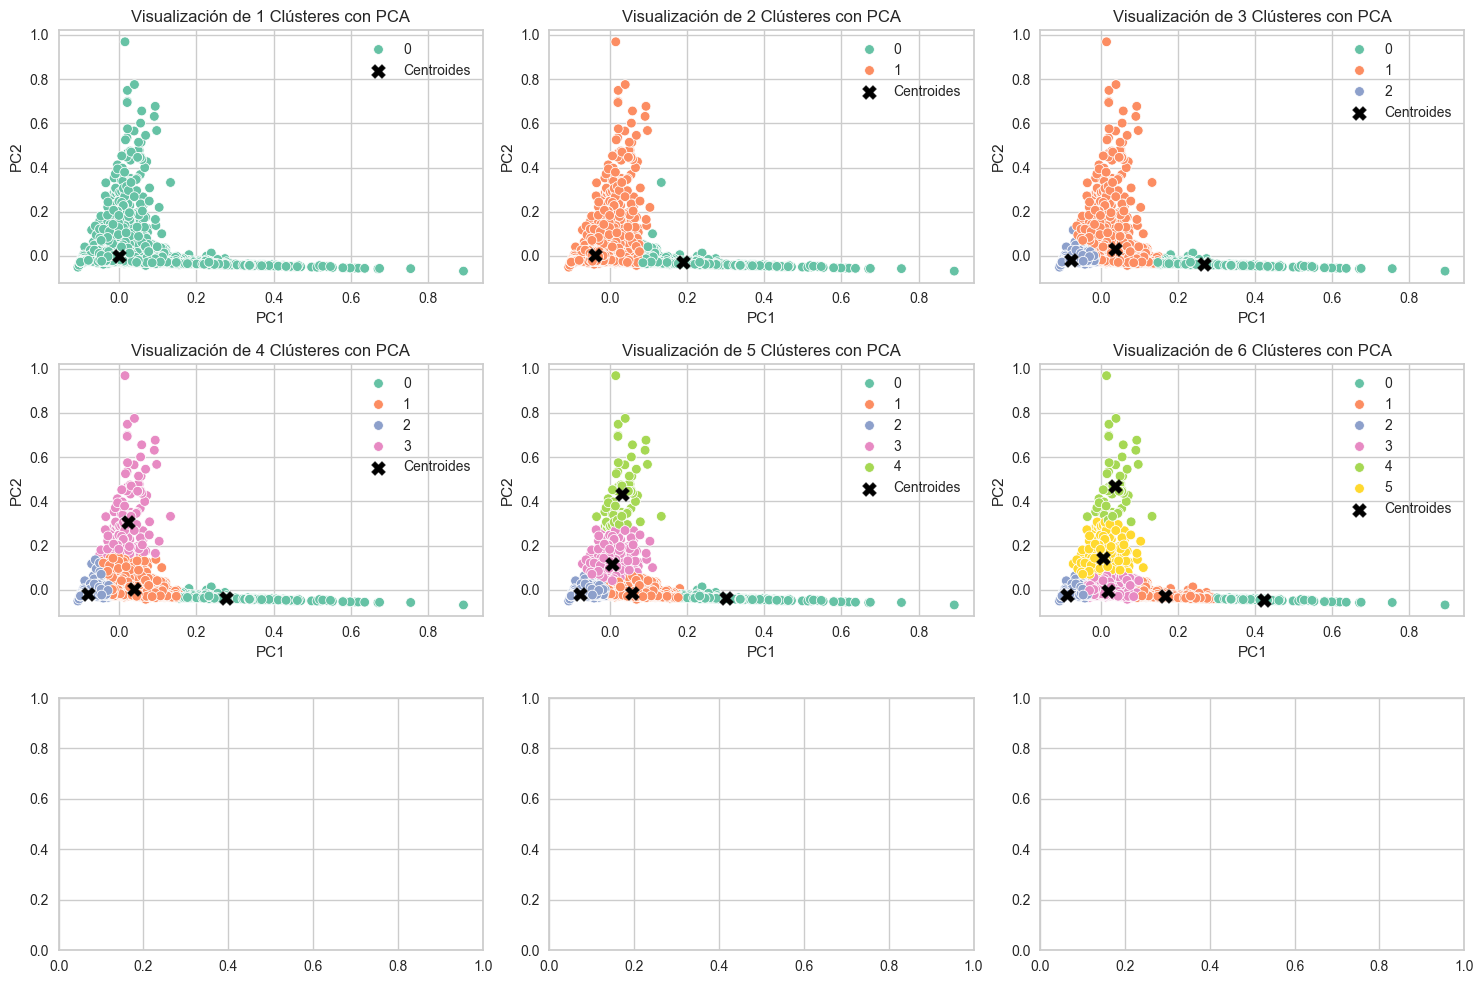

In [54]:
#Generamos gráficamente i número de clusters con su centroide
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas y 3 columnas
axes = axes.flatten()  # Convertir la matriz de subgráficas en un array plano para facilitar el acceso

for i in range(1, 7):
    # Realizar PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(df_escalado_gb_nouser)
    df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
    
    # Ajustar KMeans a los datos transformados
    kmeans = KMeans(n_clusters=i, random_state=0)
    df_pca['Cluster'] = kmeans.fit_predict(data_pca)
    
    # Obtener centroides en el espacio PCA
    centroids_pca = kmeans.cluster_centers_
    
    # Seleccionar el índice de la subgráfica
    ax = axes[i-1]
    
    # Graficar los puntos de datos
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', ax=ax)
    
    # Graficar los centroides
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=100, label='Centroides')
    
    ax.set_title(f'Visualización de {i} Clústeres con PCA')
    ax.legend()

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [21]:
#filtramos el cluster 2
df_escalado_gb.query('Cluster==2')

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
3,-Nothing-,0.000468,0.044260,0.130006,0.314577,0.000934,0.191781,2
29,1225,0.001545,0.045930,0.106343,0.314296,0.002632,0.383562,2
93,AbortedEmbryo,0.001037,0.046305,0.059649,0.315973,0.001326,0.196347,2
155,Angel777fire,0.000008,0.041470,0.102356,0.315153,0.001423,0.305936,2
178,Ashikune,0.000482,0.045025,0.110518,0.315082,0.003165,0.205479,2
...,...,...,...,...,...,...,...,...
4066,xrnath,0.000219,0.048090,0.063849,0.315594,0.013847,1.000000,2
4085,yfnfifyfif,0.000017,0.052955,0.118501,0.315459,0.001573,0.301370,2
4137,zmarat,0.000057,0.045055,0.085475,0.315322,0.001458,0.557078,2
4138,znay22,0.000031,0.042065,0.090156,0.315192,0.011309,0.410959,2


In [23]:
#Generamos la base de datos final
data_final=pd.merge(clustertest, df_escalado_gb['Cluster'], left_index=True, right_index=True, how='inner')
data_final

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
0,----------------,10.333333,0.673333,0.013667,-7.30,1.790000,2,3
1,--dilib--,210.750000,0.517500,0.008125,-867.63,3.020000,2,3
2,-31337-,32.500000,0.950000,0.000000,-33.50,36.630000,3,1
3,-Nothing-,322.876923,0.919385,0.011402,-3120.69,2.702615,42,2
4,-Tachyon,1024.800000,0.978000,0.022200,-1494.32,1.696000,4,0
...,...,...,...,...,...,...,...,...
4144,zuko,500.000000,0.000000,0.000000,-500.00,1.630000,0,1
4145,zum,101.500000,1.430000,0.056700,108.64,4.065000,2,0
4146,zviadits,25.509434,1.005660,0.007247,-260.56,6.976226,47,2
4147,zzanggu,3902.161290,0.196129,0.001652,-84003.04,3.712581,2,1


### Se mira algunas métricas para cada tipo de cluster

In [24]:
data_final.sort_values(by='Bet', ascending=False)

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
2716,hindoong,688000.0,1.023333,0.004833,65784.40,9.063333,3,1
2789,inside,622500.0,0.000000,0.000000,-1245000.00,1.480000,0,1
643,GPL89,487500.0,2.920000,0.013700,1875559.41,8.955000,2,3
3584,sce919,480000.0,2.230000,0.013500,596856.84,2.880000,1,3
4099,yudzhin,410000.0,0.000000,0.000000,-410000.00,1.270000,0,1
...,...,...,...,...,...,...,...,...
4050,xNULL,1.0,0.000000,0.000000,-2.00,22.710000,0,1
4087,yhh1109,1.0,0.000000,0.000000,-1.00,1.590000,0,1
2963,kotov73y,1.0,0.000000,0.000000,-1.00,8.380000,0,1
1867,Xchon,1.0,0.000000,0.000000,-1.00,1.160000,0,1


In [25]:
cluster0=data_final.query('Cluster==0')

In [26]:
cluster0.describe()

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.0
mean,3499.477786,1.787666,0.032325,3487.886297,12.577611,1.618076,0.0
std,10771.780012,1.096987,0.010213,14137.050725,68.484977,1.321181,0.0
min,1.000000,0.550000,0.021400,-5363.040000,0.650000,1.000000,0.0
25%,22.750000,1.200000,0.025000,8.200000,1.680000,1.000000,0.0
50%,200.000000,1.500000,0.029200,108.640000,2.630000,1.000000,0.0
75%,1275.000000,2.000000,0.037050,1402.710000,4.870000,2.000000,0.0
max,100000.000000,10.000000,0.087700,185308.490000,1122.680000,12.000000,0.0


In [27]:
cluster1=data_final.query('Cluster==1')

In [28]:
cluster1.describe()

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
count,1991.000000,1991.000000,1991.000000,1.991000e+03,1991.000000,1991.000000,1991.0
mean,5258.919924,0.592265,0.001145,-6.221644e+03,6.626481,1.927675,1.0
std,30897.238129,0.563078,0.001960,5.863514e+04,31.262740,3.524472,0.0
min,1.000000,0.000000,0.000000,-1.465228e+06,0.000000,0.000000,1.0
25%,20.000000,0.000000,0.000000,-6.000000e+02,1.540000,0.000000,1.0
50%,196.000000,0.586667,0.000000,-1.789000e+01,2.522727,1.000000,1.0
75%,1153.000000,1.050000,0.002026,1.958500e+01,4.821667,2.000000,1.0
max,688000.000000,3.846154,0.007133,2.359985e+05,1028.860000,36.000000,1.0


In [29]:
cluster2=data_final.query('Cluster==2')

In [30]:
cluster2.describe()

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
count,148.000000,148.000000,148.000000,1.480000e+02,148.000000,148.000000,148.0
mean,1550.485265,0.990000,0.008884,2.659953e+04,19.040971,74.668919,2.0
std,13278.154573,0.098887,0.002635,2.635514e+05,119.997573,33.252362,0.0
min,1.000000,0.598660,0.002967,-6.086015e+04,2.331957,41.000000,2.0
25%,12.698512,0.946297,0.007155,-1.688050e+02,4.803221,49.000000,2.0
50%,37.509480,0.997662,0.008363,5.802000e+01,6.267469,66.000000,2.0
75%,272.032843,1.036346,0.010634,1.047290e+03,9.878676,88.250000,2.0
max,161013.366337,1.326575,0.018533,3.182621e+06,1465.483779,219.000000,2.0


In [31]:
cluster3=data_final.query('Cluster==3')

In [32]:
cluster3.describe()

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
count,1667.000000,1667.000000,1667.000000,1.667000e+03,1667.000000,1667.000000,1667.0
mean,4920.562605,1.232104,0.011244,5.723657e+03,12.927477,7.943011,3.0
std,26045.963117,1.063293,0.004069,7.719801e+04,98.197659,8.969322,0.0
min,1.000000,0.238000,0.000000,-8.454236e+05,0.520000,1.000000,3.0
25%,24.833333,0.880000,0.007957,-6.983500e+01,2.517500,2.000000,3.0
50%,179.181818,1.050000,0.010433,2.307000e+01,3.860000,4.000000,3.0
75%,1070.875000,1.279706,0.013932,7.809150e+02,6.647407,10.000000,3.0
max,487500.000000,20.772500,0.021600,1.875559e+06,2893.938889,40.000000,3.0


In [33]:
data_final.to_parquet('../data/processed/data_final.parquet')